In [176]:
import yfinance as yf

#Make a DataFrame with yfiannce data

df = yf.download("SPY", period = 'max')
print(df.head())


/var/folders/fj/0v013f390gq6x6cshjlkvj7c0000gn/T/ipykernel_10984/3790888101.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("SPY", period = 'max')
[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open   Volume
Ticker            SPY        SPY        SPY        SPY      SPY
Date                                                           
1993-01-29  24.380444  24.397784  24.276402  24.397784  1003200
1993-02-01  24.553856  24.553856  24.397793  24.397793   480500
1993-02-02  24.605875  24.623215  24.484493  24.536514   201300
1993-02-03  24.865965  24.883305  24.623201  24.640541   529400
1993-02-04  24.970009  25.022030  24.675224  24.952669   531500


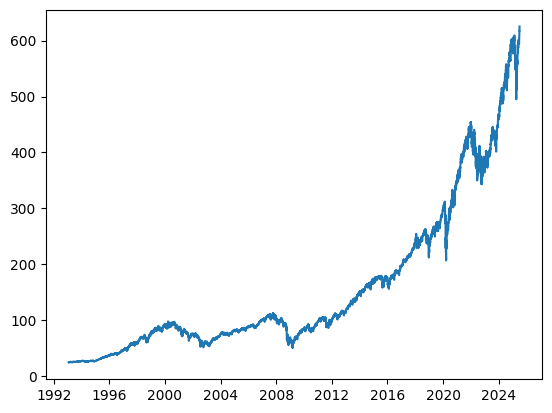

In [177]:
import matplotlib.pyplot as plt

plt.plot(df["Close"])


In [178]:
df["Moving Average"] = df["Close"].rolling(50).mean()

df

Price,Close,High,Low,Open,Volume,Moving Average
Ticker,SPY,SPY,SPY,SPY,SPY,
Date,,,,,,
1993-01-29,24.380444,24.397784,24.276402,24.397784,1003200,NaN
1993-02-01,24.553856,24.553856,24.397793,24.397793,480500,NaN
1993-02-02,24.605875,24.623215,24.484493,24.536514,201300,NaN
1993-02-03,24.865965,24.883305,24.623201,24.640541,529400,NaN
1993-02-04,24.970009,25.022030,24.675224,24.952669,531500,NaN
...,...,...,...,...,...,...
2025-06-27,614.909973,616.390015,610.830017,612.880005,86258400,577.935593
2025-06-30,617.849976,619.219971,615.039978,617.380005,92502500,579.810382


/var/folders/fj/0v013f390gq6x6cshjlkvj7c0000gn/T/ipykernel_10984/1303800539.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(TICKER, period = 'max')
[*********************100%***********************]  1 of 1 completed


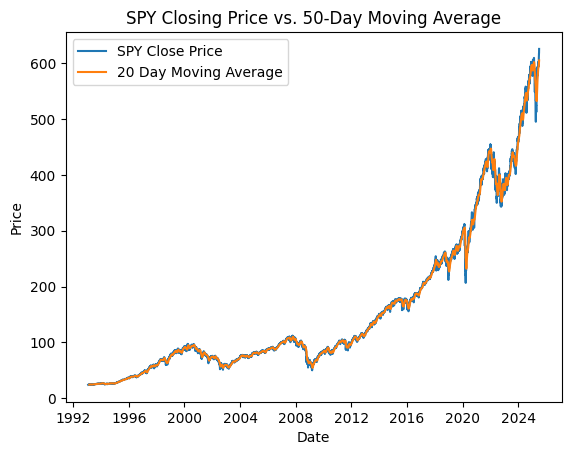

In [179]:
TICKER = 'SPY'
WINDOW = 20


df = yf.download(TICKER, period = 'max')
df["Moving Average"] = df["Close"].rolling(WINDOW).mean()


plt.plot(df["Close"])
plt.plot(df["Moving Average"])
plt.title(f"{TICKER} Closing Price vs. 50-Day Moving Average");
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend([f"{TICKER} Close Price", f"{WINDOW} Day Moving Average"])
plt.show()


In [180]:
import numpy as np

df.columns = df.columns.get_level_values(0)


def add_ma_strategy(df):

    df["Strategy"] = np.where(df["Close"] > df["Moving Average"], 1, -1)

    return df

df = add_ma_strategy(df)

df["Asset_cumulative"] = np.cumprod(1 + df["Close"].pct_change()) - 1
df["Strategy_cumulative"] = np.cumprod(1 + df["Close"].pct_change() * df["Strategy"].shift) - 1

df

TypeError: unsupported operand type(s) for *: 'float' and 'method'

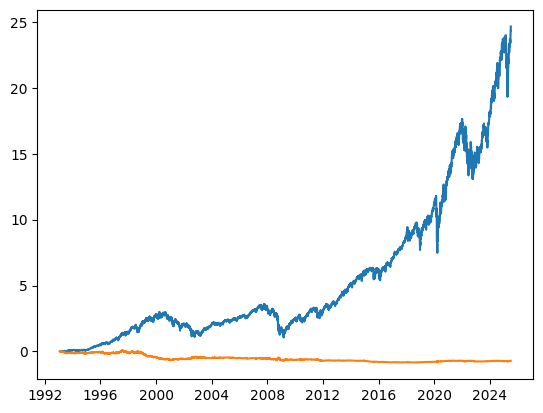

In [ ]:
plt.plot(df["Asset_cumulative"])
plt.plot(df["Strategy_cumulative"])

In [ ]:
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import pandas as pd

/var/folders/fj/0v013f390gq6x6cshjlkvj7c0000gn/T/ipykernel_10984/1219321828.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(TICKER, period = 'max')
[*********************100%***********************]  1 of 1 completed


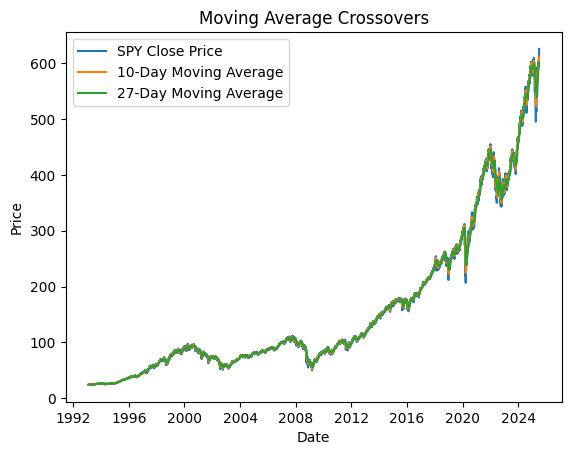

Price,Close,High,Low,Open,Volume,Moving Average,10_ma,27_ma,Strategy,Strategy_Returns,Asset_Returns
Ticker,SPY,SPY,SPY,SPY,SPY,,,,,,
Date,,,,,,,,,,,
1993-03-10,25.351486,25.351486,25.195424,25.299465,194400,24.679563,24.956140,24.713761,1.0,0.002056,0.002056
1993-03-11,25.282152,25.438215,25.247472,25.368854,70900,24.702973,25.023770,24.740735,1.0,-0.000685,-0.000685
1993-03-12,25.022028,25.091389,24.865965,25.074049,643600,24.707308,25.061918,24.756149,1.0,-0.010967,-0.010967
1993-03-15,25.143404,25.143404,25.004682,25.004682,310800,24.727248,25.119139,24.766424,1.0,-0.006169,-0.006169
1993-03-16,25.143404,25.212765,25.143404,25.143404,30800,24.778401,25.139946,24.772846,1.0,-0.006169,-0.006169
...,...,...,...,...,...,...,...,...,...,...,...
2025-06-27,614.909973,616.390015,610.830017,612.880005,86258400,598.963626,602.270172,595.333607,1.0,-0.466272,23.305245
2025-06-30,617.849976,619.219971,615.039978,617.380005,92502500,600.473486,604.531140,596.324253,1.0,-0.463720,23.421453


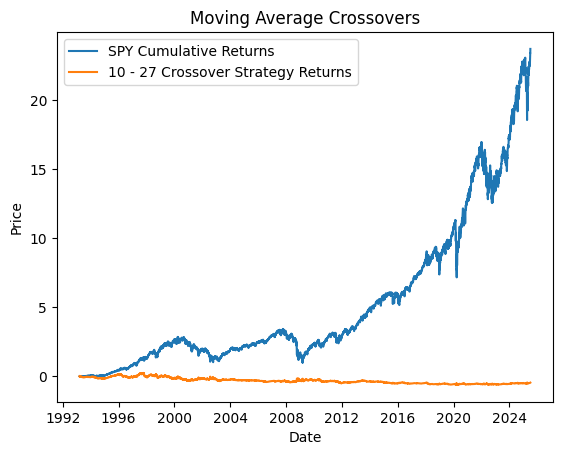

In [181]:

#Entire Program
TICKER = 'SPY'
FAST = 10
SLOW = 27
LOOKBACK = 10000


def get_data():
    df = yf.download(TICKER, period = 'max')
    df["Moving Average"] = df["Close"].rolling(WINDOW).mean()   

    #Only return the subset of data you are interested in
    return df.iloc[-LOOKBACK:, :]

def add_moving_average(df, fast, slow):
    df[f'{FAST}_ma'] = df["Close"].rolling(FAST).mean()
    df[f'{SLOW}_ma'] = df["Close"].rolling(SLOW).mean()


    plt.plot(df["Close"])
    plt.plot(df[f'{FAST}_ma'])
    plt.plot(df[f'{SLOW}_ma'])
                
    plt.title("Moving Average Crossovers")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend([f"{TICKER} Close Price", f"{FAST}-Day Moving Average", f"{SLOW}-Day Moving Average"])
    plt.show()
    return df.dropna()

def add_strategy(df, fast, slow):

    # long when fast MA > slow MA, short otherwise 
    df["Strategy"] = np.where(df[f"{FAST}_ma"] > df[f"{SLOW}_ma"], 1, -1)
    df["Strategy"] = df["Strategy"].shift(1)  # Shift to avoid lookahead bias

    return df
    



def test_strategy(df, ticker, fast, slow):
    returns = df["Close"].squeeze().pct_change()
    df["Strategy_Returns"] = (1 + returns * df["Strategy"]).cumprod() - 1
    df["Asset_Returns"] = np.cumprod(1 + df["Close"].pct_change()) - 1


    plt.figure()
    plt.plot(df["Asset_Returns"])
    plt.plot(df["Strategy_Returns"])
                
    plt.title("Moving Average Crossovers")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend([f"{ticker} Cumulative Returns", f"{fast} - {slow} Crossover Strategy Returns"])


    
    return df.dropna()

df = get_data()
df = add_moving_average(df, FAST, SLOW)
df = add_strategy(df, FAST, SLOW)
df = test_strategy(df, TICKER, FAST, SLOW)

df



/var/folders/fj/0v013f390gq6x6cshjlkvj7c0000gn/T/ipykernel_10984/1219321828.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(TICKER, period = 'max')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume,Moving Average,Strategy,Asset_cumulative,Strategy_cumulative
Date,,,,,,,,,
1993-01-29,24.380430,24.397770,24.276389,24.397770,1003200,NaN,NaN,NaN,NaN
1993-02-01,24.553827,24.553827,24.397765,24.397765,480500,NaN,-1.0,0.007112,-0.007112
1993-02-02,24.605875,24.623215,24.484493,24.536514,201300,NaN,-1.0,0.009247,-0.009217
1993-02-03,24.865973,24.883313,24.623208,24.640549,529400,NaN,-1.0,0.019915,-0.019690
1993-02-04,24.970007,25.022028,24.675222,24.952667,531500,NaN,-1.0,0.024182,-0.023791
...,...,...,...,...,...,...,...,...,...
2025-06-27,614.909973,616.390015,610.830017,612.880005,86258400,598.963626,1.0,24.221457,-0.724678
2025-06-30,617.849976,619.219971,615.039978,617.380005,92502500,600.473486,1.0,24.342046,-0.723362
2025-07-01,617.650024,618.830017,615.520020,616.359985,70030100,601.807840,1.0,24.333844,-0.723452


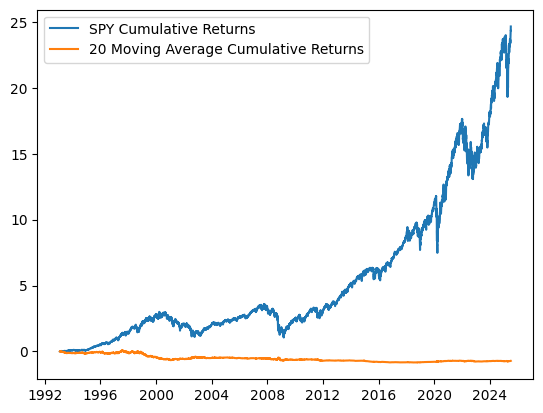

In [182]:
def add_moving_average(df):
    df.columns = df.columns.get_level_values(0)
    df["Strategy"] = np.where(df["Close"] > df["Moving Average"], 1, -1)
    df["Strategy"] = df["Strategy"].shift(1)  # Shift strategy to avoid lookahead bias
    return df

def test_strategy(df):
    df["Asset_cumulative"] = np.cumprod(1 + df["Close"].pct_change()) - 1
    df["Strategy_cumulative"] = np.cumprod(1 + df["Close"].pct_change() * df["Strategy"]) - 1

    # Plotting the results
    plt.plot(df["Asset_cumulative"])
    plt.plot(df["Strategy_cumulative"])
    plt.legend([f"{TICKER} Cumulative Returns", f"{WINDOW} Moving Average Cumulative Returns"])
    return df 


def main():
    df = get_data()
    df = add_moving_average(df)
    df = test_strategy(df)
    return df 

main()